# Linear Regression Assignment

In [1]:
# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 50

### Loading and understanding the data

In [3]:
# Reading the dataset
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# Finding the shape of the dataset
bike.shape

(730, 16)

We can see that our dataset has 16 columns and 730 rows.

In [5]:
# Finding the general info about our dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


By comparing the total entries and non-null content, we can see that there are no null values.

In [6]:
# Finding the number of unique values for each variable
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

We need to change the type of certain columns like `season`, `mnth`, `weathersit`, `weekday` to object type by comparing it with the data dictionary.

In [7]:
# finding the attributes of numerical variables
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Changing the 'weekday' variable to categorical
bike[['weekday']] = bike[['weekday']].apply(lambda x: x.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 
                                                             4:'Thursday', 5:'Friday', 6:'Saturday'}))
# Changing the 'mnth' variable to categorical
bike[['mnth']] = bike[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',
                                                        8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))

# Changing the 'weathersit' variable to categorical
bike[['weathersit']] = bike[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Cloudy',3:'Light rain',4:'Heavy rain'}))

# Changing the 'season' variable to categorical
bike[['season']] = bike[['season']].apply(lambda x: x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}))

In [9]:
# Changing binary variables - 'yr', 'holiday', 'workingday' to categorical
bike[['yr']] = bike[['yr']].apply(lambda x: x.map({0:'2018', 1:'2019'}))
bike[['holiday']] = bike[['holiday']].apply(lambda x: x.map({0:'No', 1:'Yes'}))
bike[['workingday']] = bike[['workingday']].apply(lambda x: x.map({0:'No', 1:'Yes'}))

In [10]:
# Checking the datatypes of the variables after conversion
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


### Visualising the variables

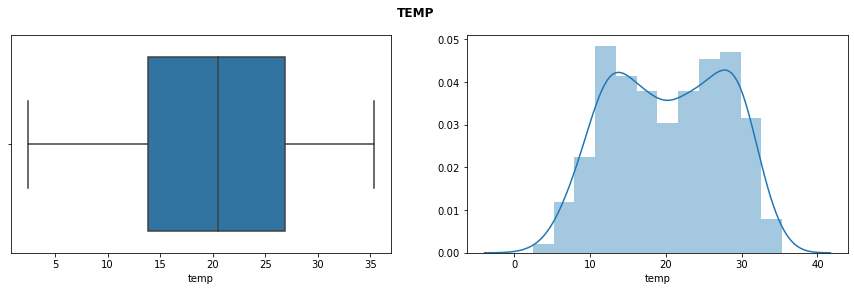

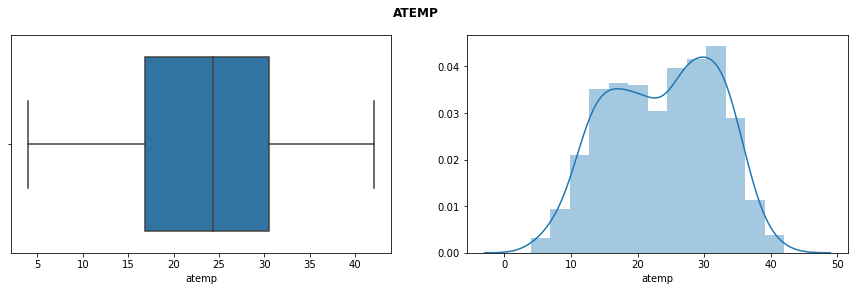

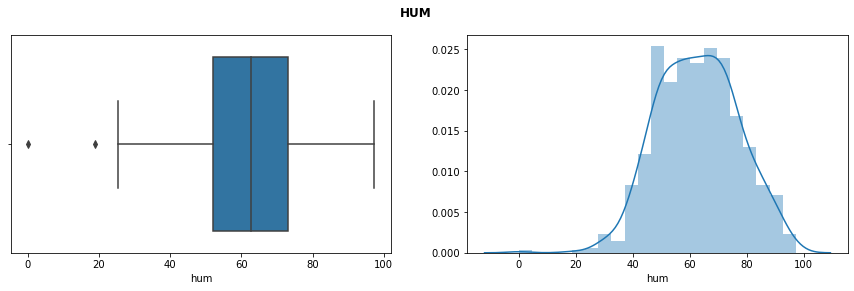

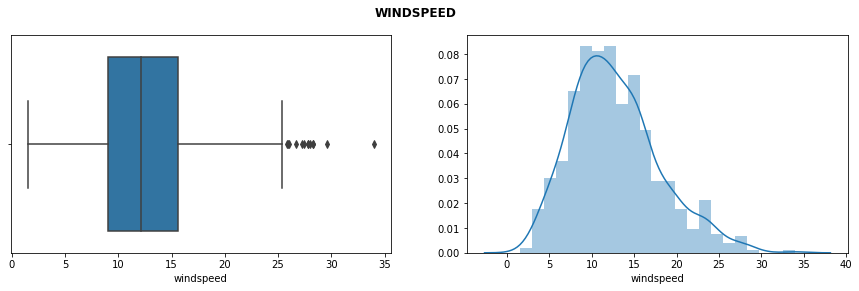

In [11]:
# Univariate analysis of numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
for i in num_vars:
    plt.figure(figsize = (15,4))
    plt.subplot(1, 2, 1)
    sns.boxplot(i, data=bike)

    plt.subplot(1, 2, 2)
    sns.distplot(bike[i])
    plt.suptitle(i.upper(), weight='bold')

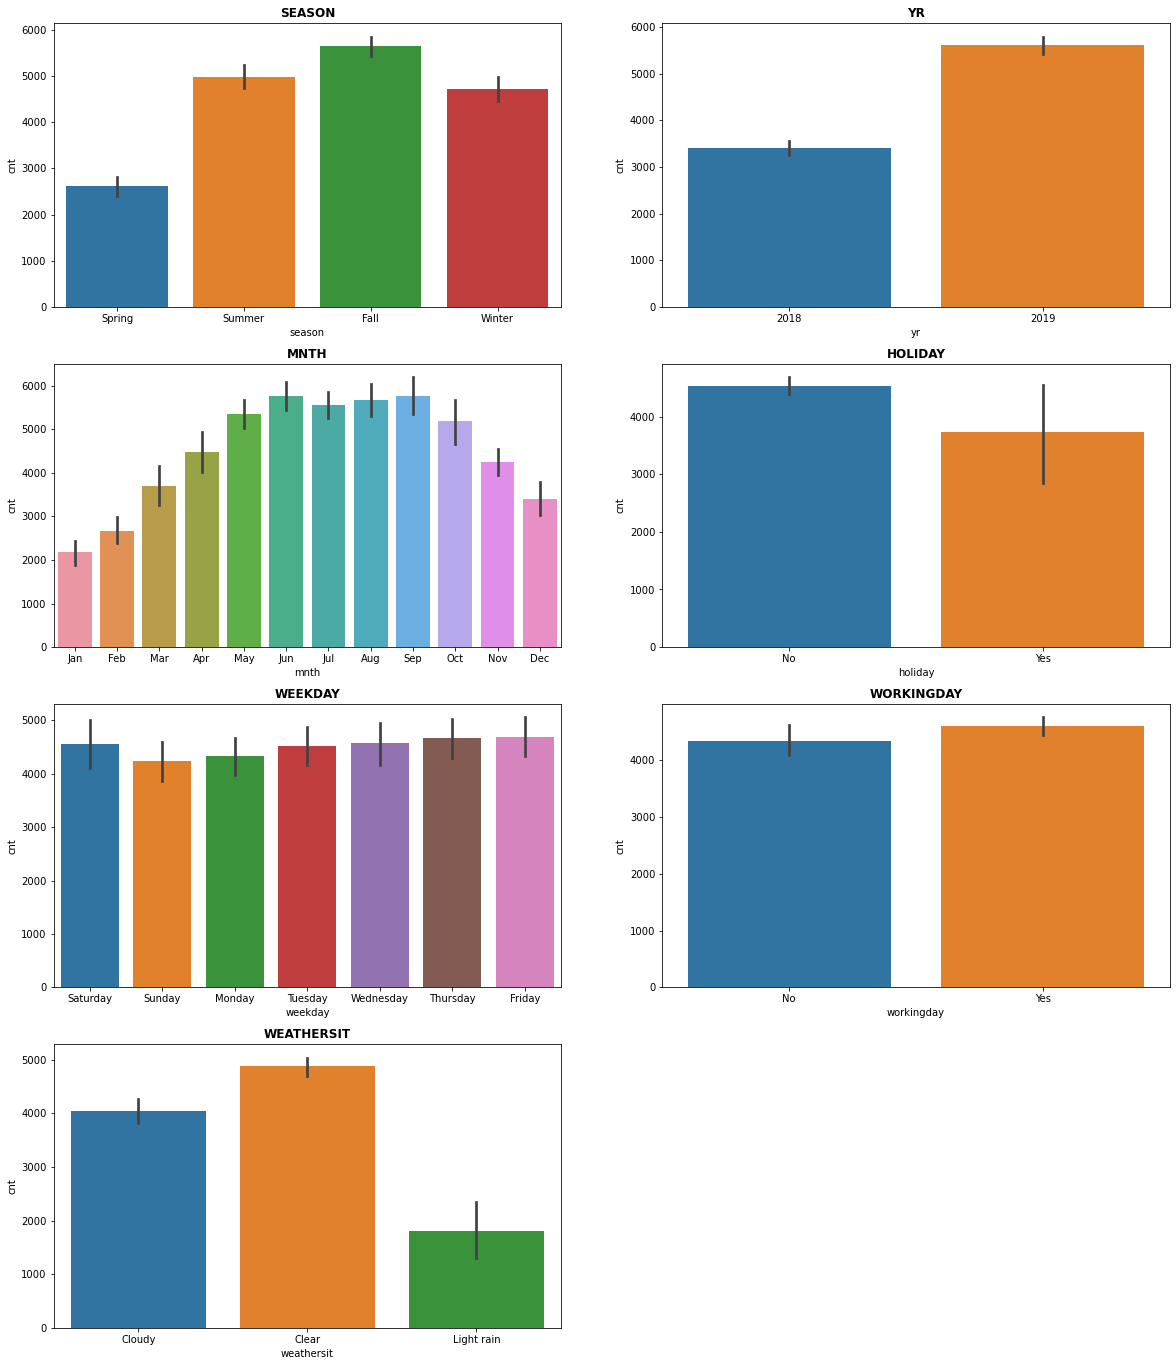

In [12]:
# Plotting categorical variables
plt.figure(figsize = (20,24))
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in enumerate(cat_vars):
    plt.subplot(4, 2, i[0]+1)
    sns.barplot(x=i[1], y='cnt', data=bike)
    plt.title(i[1].upper(), weight='bold')

From the above plots we can draw the following inferences:
- Season:
    - The average number of bikes rented is highest during the **fall**.
    - The lowest average number of bikes rented is during the **spring**.
- Year:
    - We can clearly see that the number of rentals has seen a steep rise from 2018 in 2019.
- Month:
    - The majority of the rentals have occurred during the months of Jun, Jul, Aug, Sep which conforms with the fall season in the data.  
- Holiday:
    - The average number of rentals is lesser on a holiday compared to a non-holiday.
- Weekday:
    - We can see that the average usage is highest on Saturday and lowest on Sunday.
    - Other weekdays, have more or less similar average bike rentals.
- Working day:
    - Working day has a slightly better average number of bike rentals.
- Weather:
    - The highest count is during the **clear** weather, followed by cloudy weather.
    - The lowest count is during **light rain**. 
    - There are no records during heavy rain.

We'll drop the columns `casual` and `registered` as they are redundant with our target variable `cnt`. We'll drop the `instant` column as it is only an index column and doesnot help in analysis. We can also drop `dteday` as we are not performing time-series analysis.

In [13]:
# dropping columns not useful for analysis
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Saturday,No,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Sunday,No,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


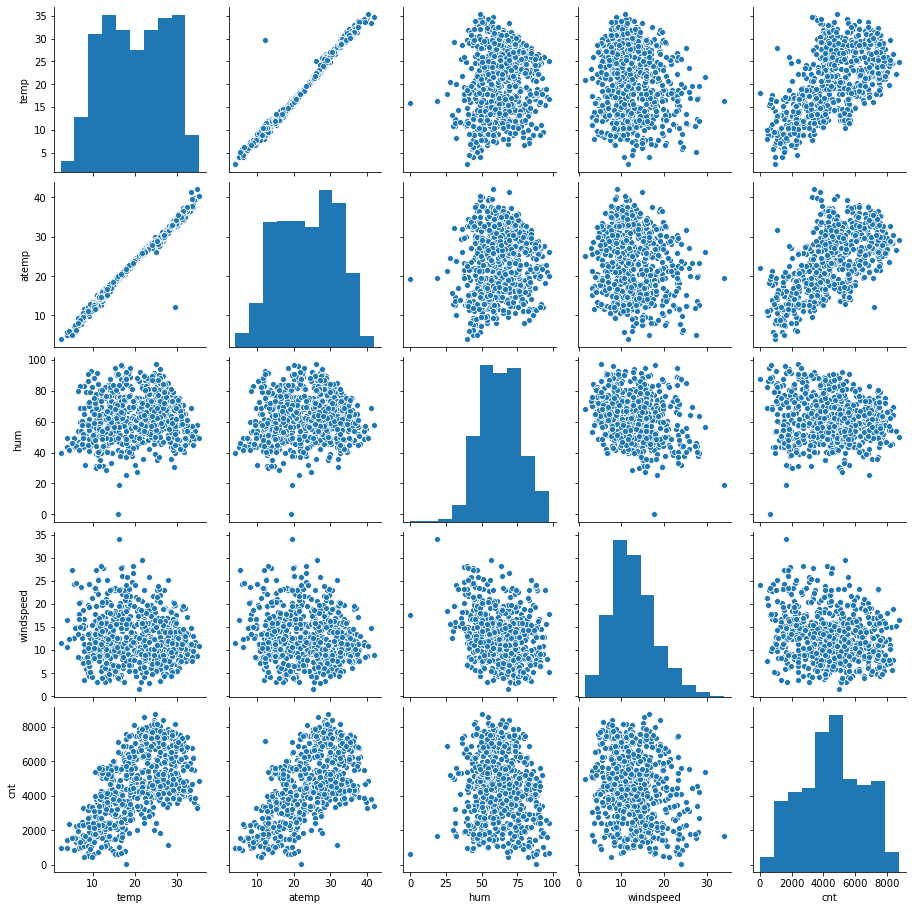

In [14]:
# plotting pairplot for the numerical variables
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

From the above pairplots we can see that,
- Variables `temp` and `atemp` show highest linear correlation with our target variable (`cnt`).
- `hum` and `windspeed` doesnot show any definitive relationship with `cnt`.
- `temp` and `atemp` show a linear relationship among themselves.

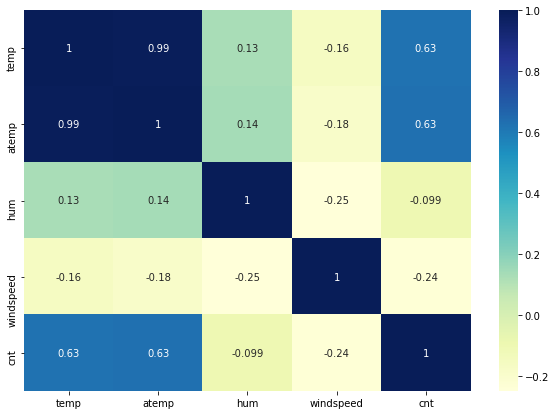

In [15]:
# finding the correlation between the numerical variables in the dataset
plt.figure(figsize=(10,7))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

From the correlation heatmap we can see that,
- Our taget variable `cnt` is highly correlated with `temp` and `atemp`(0.63 each). So, this may be our driver variable.
- But, the variables `temp` and `atemp` are highly correlated (0.99) among themselves. So, it might result in multicollinearity if we use both of these in our models.
- `windspeed` has a negative relation (-0.24) with our target variable.

### Data Preparation

In [16]:
# creating dummies for columns 'weathersit' and 'season'
season = pd.get_dummies(bike['season'], drop_first=True)
yr = pd.get_dummies(bike['yr'], drop_first=True)
weather = pd.get_dummies(bike['weathersit'], drop_first=True)
mnth = pd.get_dummies(bike['mnth'], drop_first=True)
weekday = pd.get_dummies(bike['weekday'], drop_first=True)

bike = pd.concat([bike, yr, season, weather, mnth, weekday],axis=1)

# dropping the 'weathersit' and 'season' columns
bike.drop(['yr', 'weathersit','season', 'mnth', 'weekday'], axis=1, inplace=True)
bike.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,Cloudy,Light rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,No,No,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,No,No,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,No,Yes,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,No,Yes,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,No,Yes,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
# Changing binary variables from object to numerical form
bike[['holiday']] = bike[['holiday']].apply(lambda x: x.map({'No':0, 'Yes':1}))
bike[['workingday']] = bike[['workingday']].apply(lambda x: x.map({'No':0, 'Yes':1}))
bike.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,Cloudy,Light rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
# Checking the info of the variables after creating dummies
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   2019        730 non-null    uint8  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Cloudy      730 non-null    uint8  
 12  Light rain  730 non-null    uint8  
 13  Aug         730 non-null    uint8  
 14  Dec         730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  Jan         730 non-null    uint8  
 17  Jul         730 non-null    uint8  
 18  Jun         730 non-null    uint8  
 19  Mar         730 non-null    u

In [19]:
# finding the shape of dataset after creating dummy variables
bike.shape

(730, 30)

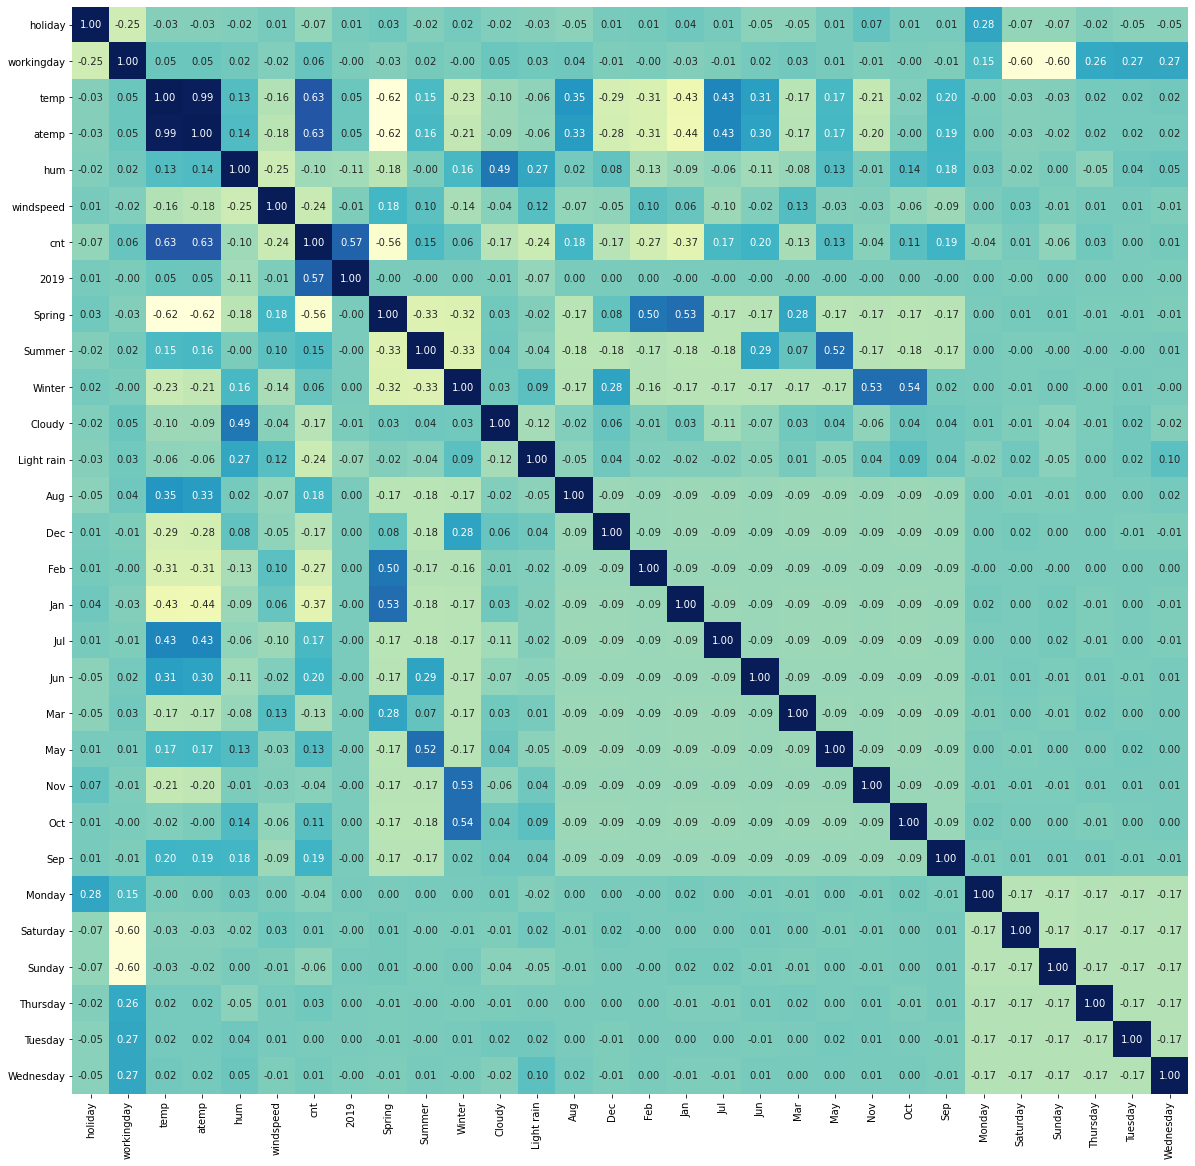

In [20]:
# finding the correlation
plt.figure(figsize=(20,20))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu', fmt='.2f', cbar=False)
plt.show()

### Splitting the data into train and test sets

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike, train_size = 0.7, random_state=100)

print('The size of train data: ', df_train.shape)
print('The size of test data: ', df_test.shape)

The size of train data:  (510, 30)
The size of test data:  (220, 30)


### Rescaling the features

We are using `MinMaxScaler` to scale our variables.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# Scaling the numerical variables except dummy variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,Cloudy,Light rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,Cloudy,Light rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843,0.243137,0.247059,0.247059,0.345098,0.029412,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429,0.429398,0.431725,0.431725,0.475867,0.169124,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


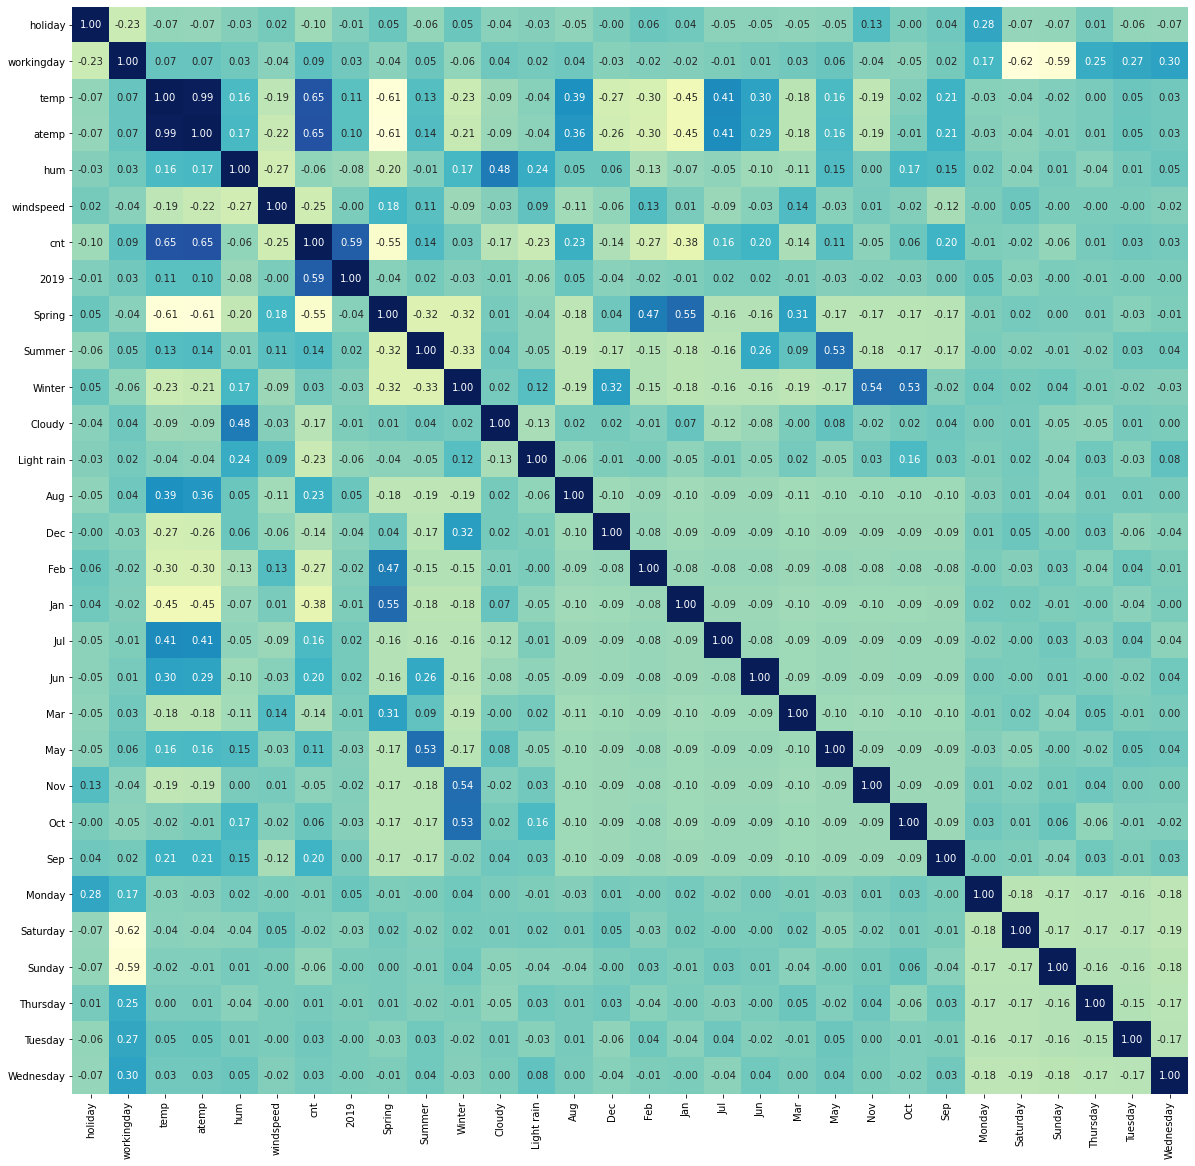

In [25]:
# finding the correlation of the training set
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu', fmt='.2f', cbar=False)
plt.show()

In [26]:
# Dividing the X and y variable
y_train = df_train.pop('cnt')
X_train = df_train

### Performing RFE

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2019', True, 1),
 ('Spring', False, 2),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Cloudy', False, 3),
 ('Light rain', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 19),
 ('Mar', False, 20),
 ('May', False, 12),
 ('Nov', False, 7),
 ('Oct', False, 18),
 ('Sep', True, 1),
 ('Monday', False, 14),
 ('Saturday', False, 4),
 ('Sunday', False, 10),
 ('Thursday', False, 16),
 ('Tuesday', False, 15),
 ('Wednesday', False, 17)]

In [30]:
# Selecting the variables chosen by RFE
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', '2019', 'Summer', 'Winter',
       'Light rain', 'Jul', 'Sep'],
      dtype='object')

In [31]:
# Knowing the variables rejected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Spring', 'Cloudy', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodels

In [32]:
# Creating X_train_1 dataframe with RFE selected variables
X_train_1 = X_train[col]

In [33]:
# Defining a function to know vif values
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model - 1

Using all the variables selected by RFE.

In [34]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_1)
lm_1 = sm.OLS(y_train,X_train_lm).fit()
print(lm_1.summary())
print('='*100)
print()
print(vif(X_train_1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          2.79e-186
Time:                        21:53:28   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.0

- p-values of the variables in our model are well below the significance level (0.05).
- From the VIF values of the above model, we can see the `hum` has the highest VIF. So, we'll drop that variable and update our model.

### Model - 2

In [35]:
X_train_2 = X_train_1.drop('hum', axis=1)

X_train_lm = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train,X_train_lm).fit()
print(lm_2.summary())
print('='*100)
print()
print(vif(X_train_2))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          4.42e-171
Time:                        21:53:29   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.018      4.794      0.0

- The p-value of `Jul` is more than our cutoff value and hence we can drop that variable.
- The VIF values of the variables are less than the cutoff value (5).

### Model - 3

In [36]:
X_train_3 = X_train_2.drop('Jul', axis=1)
X_train_lm = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train,X_train_lm).fit()
print(lm_3.summary())
print('='*100)
print()
print(vif(X_train_3))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          9.22e-172
Time:                        21:53:29   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.0

- We have arrived at our model, where all the variables have p-value < 0.05 and the vif < 5. Hence, `lm_3` will be our final model which will be used for prediction.
- The top 3 variables based on the coefficients: `temp`, `yr`, `Light Rain`.
 
The Durbin-Watson Statistic of the model is 2.021 (closer to 2), confirming that the residuals are not autocorrelated.

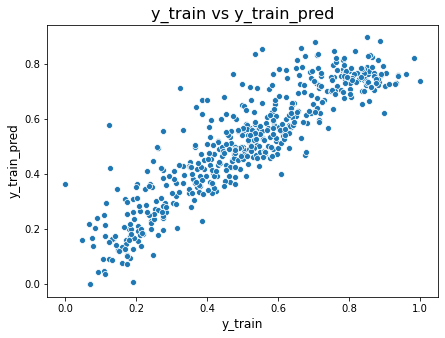

In [37]:
# Plotting y_train vs. y_train_pred
y_train_pred = lm_3.predict(X_train_lm)

plt.figure(figsize=(7,5))
sns.scatterplot(y_train, y_train_pred)
plt.title('y_train vs y_train_pred', fontsize = 16)
plt.xlabel('y_train', fontsize = 12)
plt.ylabel('y_train_pred', fontsize = 12) 
plt.show()

### Residual Analysis

#### Test for zero mean of residuals

In [38]:
resids = lm_3.resid

# finding the mean of the residuals 
resids.mean()

-3.1995103734173016e-16

The mean of the residuals of our model is approximately equal to 0.

#### Test for normal distribution of residuals

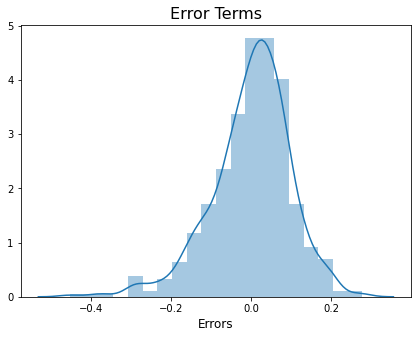

In [39]:
# Plotting the distplot of the residuals 
plt.figure(figsize=(7,5))
sns.distplot(resids, bins = 20)
plt.title('Error Terms', fontsize = 16)
plt.xlabel('Errors', fontsize = 12)
plt.show()

The distplot of the residuals shows that they follow normal distribution. But we'll confirm this by plotting Q-Q plot.

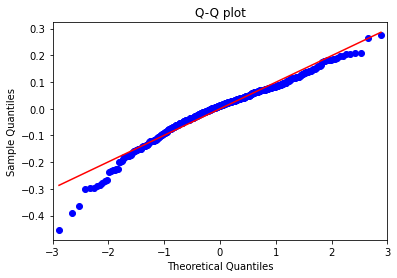

In [40]:
# Plotting Q-Q plot
sm.ProbPlot(lm_3.resid).qqplot(line='s')
plt.title('Q-Q plot')
plt.show()

From the above plot, we can see that the residuals are normally distributed for most of the part and slightly deviates only in the extremes.

#### Test for homoscedacity

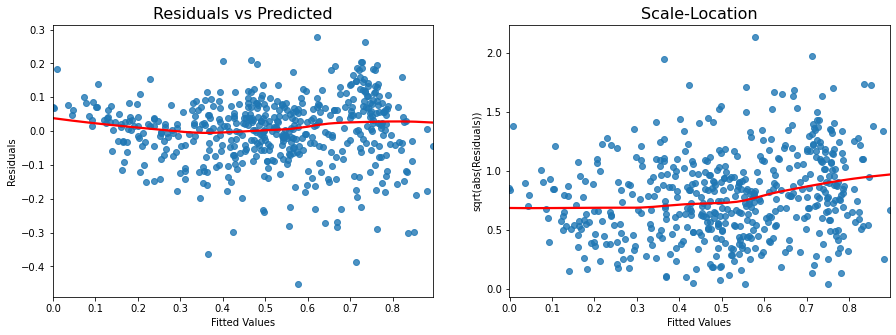

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.regplot(x=y_train_pred, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Predicted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

resids_standardized = lm_3.get_influence().resid_studentized_internal
sns.regplot(x=y_train_pred, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')
plt.show()

- The Residuals vs Predicted plot doesnot follow any particular pattern and is randomly spread across.
- We see a near horizontal line with randomly spreadout points in Scale-Location plot, which shows the residuals are spread equally along the ranges of predictors

### Making predictions in test data using the final model

In [42]:
# Similar treating of the test set as done for train
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [43]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,Cloudy,Light rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.481818,0.254545,0.263636,0.236364,0.318182,0.027273,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.500809,0.436599,0.441609,0.425817,0.466833,0.163248,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# Dividing X and y variable
y_test = df_test.pop('cnt')
X_test = df_test

In [45]:
# Subsetting the test set to the variables present in the final model
df_test = df_test[col]
df_test.drop(['hum', 'Jul'],axis=1,inplace=True)
df_test.head()

,holiday,temp,windspeed,2019,Summer,Winter,Light rain,Sep
184,1,0.831783,0.084219,0,0,0,0,0
535,0,0.901354,0.153728,1,1,0,0,0
299,0,0.511964,0.334206,0,0,1,0,0
221,0,0.881625,0.339570,0,0,0,0,0
152,0,0.817246,0.537414,0,1,0,0,0


In [46]:
X_test = df_test
# Adding constant variable to the X_test
X_test_lm = sm.add_constant(X_test)

In [47]:
# Making prediction in the test set using final model
y_test_pred = lm_3.predict(X_test_lm)

### Model Evaluation

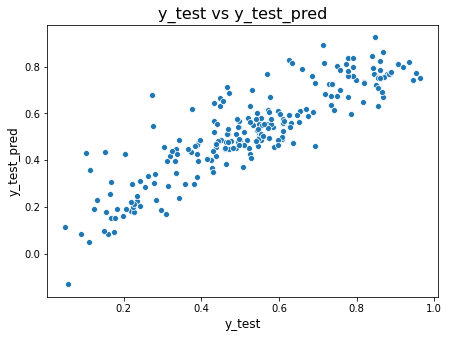

In [48]:
# Plotting y_test vs y_test_pred
plt.figure(figsize=(7,5))
sns.scatterplot(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 16)
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_test_pred', fontsize = 12)  
plt.show()

We can see that the equation of our best fitted line: **cnt = 0.0875 - 0.0867 x holiday + 0.5682 x temp - 0.1455 x windspeed + 0.2334 x yr + 0.0812 x Summer + 0.1261 x Winter - 0.2535 x Light rain + 0.0895 x Sep**

### Finding the R-squared of train and test datasets

In [49]:
# Importing r2_score from sklearn module
from sklearn.metrics import r2_score

In [50]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

n1 = X_train_3.shape[0]
p1 = X_train_3.shape[1]
adj_r2_train = 1 - (1 - r2_train) * (n1 - 1) / (n1 - p1 - 1)

n2 = X_test.shape[0]
p2 = X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n2 - 1) / (n2 - p2 - 1)

print('R-squared value for train data:', round(r2_train, 3))
print('Adj. R-squared value for train data:', round(adj_r2_train, 3))
print()
print('R-squared value for test data:', round(r2_test, 3))
print('Adj. R-squared value for test data:', round(adj_r2_test, 3))

R-squared value for train data: 0.804
Adj. R-squared value for train data: 0.801

R-squared value for test data: 0.772
Adj. R-squared value for test data: 0.763


We can see that the R-squared of both train and test data are closer to each other, indicating that it is a good model.